In [ ]:
#!pip install split-folders

In [ ]:
#import splitfolders

In [ ]:
import numpy as np
import os

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import PIL.Image as Image
import tensorflow as tf
import cv2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
!cd /content/drive/MyDrive/
!pwd

/content


In [ ]:
#To convert image to greyscale
# target_directory = '/content/drive/MyDrive/Colab/Pneumonia/train/PNEUMONIA/'

# ind = 0
# for file in os.listdir(target_directory):
#     try:
#       im = Image.open(target_directory + file)
#       if len(np.array(im).shape) == 3 :
#         im = im.convert('L')
#         im.save(target_directory + file)
#         ind += 1
#         if ind%100 == 0 :
#           print('Number of images done =', ind)
#     except OSError:
#         print('Cannot convert %s' % file)
# print('Number of images done =', ind)



In [ ]:
# from zipfile import ZipFile
# zip_file = '/content/drive/MyDrive/Colab/pneumonia.zip'
# destination = '/content/drive/MyDrive/Colab/'

# with ZipFile(zip_file ) as fileobj:
#     fileobj.extractall()

In [ ]:
#!ls -ls /content/drive/MyDrive/Colab/TB_Data/train/Normal/*.jpg | tail -20

In [ ]:
# input_folder = '/content/drive/MyDrive/Colab/TB_Data/Normal'
# output_folder = './drive/MyDrive/Colab/TB_Data'
# splitfolders.ratio('/content/drive/MyDrive/Colab/TB_Data', output='/content/drive/MyDrive/Colab/TB_Data', seed=7, ratio=(.8, .2), group_prefix=None) # default values

In [ ]:
base_dir =  '/content/drive/MyDrive/Colab/Pneumonia'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_norm_dir = os.path.join(train_dir, 'NORMAL') 
train_pn_dir = os.path.join(train_dir, 'PNEUMONIA')  # directory with our training dog pictures
validation_norm_dir = os.path.join(validation_dir, 'NORMAL')  # directory with our validation cat pictures
validation_pn_dir = os.path.join(validation_dir, 'PNEUMONIA')  # directory with our validation dog pictures

In [ ]:
num_norm_tr = len(os.listdir(train_norm_dir))
num_pn_tr = len(os.listdir(train_pn_dir))

num_norm_val = len(os.listdir(validation_norm_dir))
num_pn_val = len(os.listdir(validation_pn_dir))

total_train = num_norm_tr + num_pn_tr
total_val = num_norm_val + num_pn_val


In [ ]:
print('total training Normal images:', num_norm_tr)
print('total training Pneumonia images:', num_pn_tr)

print('total validation Normal images:', num_norm_val)
print('total validation Pneumonia images:', num_pn_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Normal images: 1341
total training Pneumonia images: 3875
total validation Normal images: 234
total validation Pneumonia images: 390
--
Total training images: 5216
Total validation images: 624


In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_norm = (1 / num_norm_tr)*(total_train)/2.0 
weight_for_pn = (1 / num_pn_tr)*(total_train)/2.0

class_weight = {0: weight_for_norm, 1: weight_for_pn}

print('Weight for class Normal: {:.2f}'.format(weight_for_norm))
print('Weight for class Pneumonia: {:.2f}'.format(weight_for_pn))

Weight for class Normal: 1.94
Weight for class Pneumonia: 0.67


In [ ]:
!ls /content/drive/MyDrive/Colab/Pneumonia/train/NORMAL/ | head -5

IM-0115-0001.jpeg
IM-0117-0001.jpeg
IM-0119-0001.jpeg
IM-0122-0001.jpeg
IM-0125-0001.jpeg


In [ ]:
IMAGE_RES = 256
import PIL.Image as Image

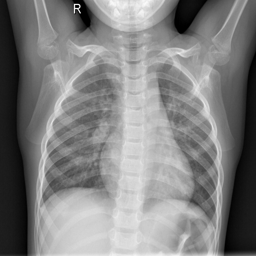

(256, 256)

In [ ]:
normal = Image.open("/content/drive/MyDrive/Colab/Pneumonia/train/NORMAL/IM-0115-0001.jpeg").resize((IMAGE_RES, IMAGE_RES) )
display(normal)
normal = np.array(normal)/255.0
normal.shape

In [ ]:
#!ls -ls /content/drive/MyDrive/Colab/Pneumonia/train/PNEUMONIA

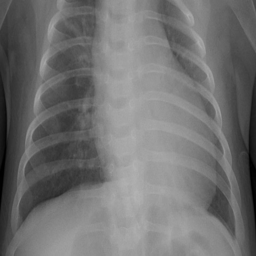

(256, 256)

In [ ]:
pn = Image.open("/content/drive/MyDrive/Colab/Pneumonia/train/PNEUMONIA/person1170_virus_1969.jpeg").resize((IMAGE_RES, IMAGE_RES) )
display(pn)
pn = np.array(pn)/255.0
pn.shape

In [ ]:
#!ls /content/drive/MyDrive/Colab/Pneumonia/train/PNEUMONIA/ | tail -5

In [ ]:
IMAGE_RES=100

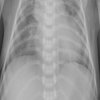

(100, 100)

In [ ]:
pn = Image.open("/content/drive/MyDrive/Colab/Pneumonia/train/PNEUMONIA/person1668_bacteria_4421.jpeg").resize((IMAGE_RES, IMAGE_RES))
display(pn)
pn = np.array(pn)/255
pn.shape


In [ ]:
#!ls -ls /content/drive/MyDrive/Colab/Pneumonia/val/PNEUMONIA

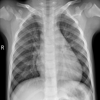

(100, 100)

In [ ]:
normal = Image.open("/content/drive/MyDrive/Colab/Pneumonia/val/NORMAL/NORMAL2-IM-0353-0001.jpeg").resize((IMAGE_RES, IMAGE_RES) )
display(normal)
normal = np.array(normal)/255.0
normal.shape

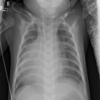

(100, 100)

In [ ]:
pn = Image.open("/content/drive/MyDrive/Colab/Pneumonia/val/PNEUMONIA/person95_bacteria_463.jpeg").resize((IMAGE_RES, IMAGE_RES) )
display(pn)
pn = np.array(normal)/255.0
pn.shape

In [ ]:
BATCH_SIZE = 200  # Number of training examples to process before updating our models variables
IMG_SHAPE = 256

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [ ]:

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                           class_mode='binary', 
                                                           color_mode= 'grayscale')

Found 5216 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                              class_mode='binary',
                                                              color_mode= 'grayscale')

Found 624 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen) 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
#plotImages(sample_training_images[:5])  # Plot images 0-4

In [ ]:
sample_training_images.shape

(200, 256, 256, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE,1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
   # tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.5), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'],
               )

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 57600)            

In [ ]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/Colab/pneumonia_model_cnn')

In [ ]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    #steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    #validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))), 
    class_weight=class_weight
    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
27/27 [==============================] - 61s 2s/step - loss: 0.1848 - accuracy: 0.9331 - val_loss: 0.3515 - val_accuracy: 0.8494
Epoch 2/10
27/27 [==============================] - 58s 2s/step - loss: 0.1719 - accuracy: 0.9367 - val_loss: 0.3195 - val_accuracy: 0.8686
Epoch 3/10
27/27 [==============================] - 58s 2s/step - loss: 0.1653 - accuracy: 0.9363 - val_loss: 0.3980 - val_accuracy: 0.8285
Epoch 4/10
27/27 [==============================] - 58s 2s/step - loss: 0.1557 - accuracy: 0.9402 - val_loss: 0.3468 - val_accuracy: 0.8638
Epoch 5/10
27/27 [==============================] - 58s 2s/step - loss: 0.1458 - accuracy: 0.9509 - val_loss: 0.3480 - val_accuracy: 0.8654
Epoch 6/10
27/27 [==============================] - 58s 2s/step - loss: 0.1340 - accuracy: 0.9479 - val_loss: 0.3955 - val_accuracy: 0.8381
Epoch 7/10
27/27 [==============================] - 58s 2s/step - loss: 0.1279 - accuracy: 0.9525 - val_loss: 0.4134 - val_accuracy: 0.8301
Epoch 8/10
27/27 [==

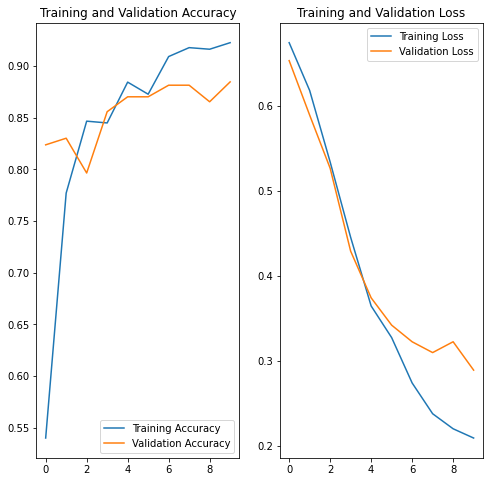

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab/pneumonia_model_cnn')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/pneumonia_model_cnn/assets


In [ ]:
model_cnn = tf.keras.models.load_model('/content/drive/MyDrive/Colab/pneumonia_model_cnn')

In [ ]:
#model_cnn = model

In [ ]:
def predict_class(model, image_size, imgray):
  img=np.array(imgray)/255
  #print(img.shape)
  if len(img.shape) != 2 :
    print ("Image must be 2 dimensional grey image")
    return "Error"
  #img = np.tile(img[:, :, None], [1, 1, 3])
  #print(img.shape)
  img = img.reshape(-1,image_size, image_size, 1 )
  #print(img.shape)
  pred = model.predict(img)
  if np.round(pred) == 1:
    return "Pneumonia"
  else: 
    return "Normal"

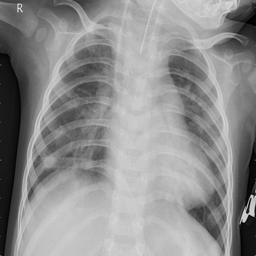

'Pneumonia'

In [ ]:
imgray = Image.open(os.path.join(validation_pn_dir, "person101_bacteria_484.jpeg")).resize((IMG_SHAPE,IMG_SHAPE)) 
display(imgray)
predict_class(model_cnn, IMG_SHAPE, imgray)

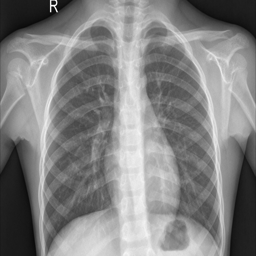

'Normal'

In [ ]:
imgray = Image.open(os.path.join(validation_norm_dir, "IM-0001-0001.jpeg")).resize((IMG_SHAPE,IMG_SHAPE)) 
display(imgray)
predict_class(model_cnn,IMG_SHAPE, imgray)

In [ ]:
#validation for normal images 
def validation(model, image_size, validation_dir):
  tot = 0
  norm = 0
  pn =0
  err = 0
  for file in os.listdir(validation_dir):
    imgray = Image.open(os.path.join(validation_dir, file) ).resize((image_size,image_size))
    pred = predict_class(model,image_size, imgray)
    if pred == "Normal":
      norm += 1
    elif pred == "Pneumonia":
      pn += 1
    elif pred not in ["Normal", "Pneumonia"] :
      print("Error, Image Name:", file)
      err += 1
    tot += 1
  print (tot, norm, pn , err)

In [ ]:
validation(model_cnn, IMG_SHAPE, validation_norm_dir)
validation(model_cnn, IMG_SHAPE, validation_pn_dir)

234 188 46 0
390 27 363 0


In [ ]:
(188+363)/(234+390)



0.8830128205128205

In [ ]:
validation(model_cnn, IMG_SHAPE, train_norm_dir)
validation(model_cnn, IMG_SHAPE, train_pn_dir)

1341 1293 48 0
3875 346 3529 0


In [ ]:
#########################################################
############VGG
#########################################################

In [ ]:
IMG_SHAPE= 224
BATCH_SIZE=100
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                              class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.models import Model

In [ ]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SHAPE,IMG_SHAPE,3))
for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
#x= GlobalAveragePooling2D()(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
x=Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(.5)(x)
x=Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.train=False

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-5), metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
print (class_weight)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [ ]:
EPOCHS=25

history = model.fit(train_data_gen, epochs= EPOCHS, validation_data=val_data_gen, 
          validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))) , class_weight = class_weight)

Epoch 1/25
53/53 [==============================] - 68s 1s/step - loss: 0.6775 - accuracy: 0.6289 - val_loss: 0.5010 - val_accuracy: 0.8189
Epoch 2/25
53/53 [==============================] - 65s 1s/step - loss: 0.4838 - accuracy: 0.7854 - val_loss: 0.4062 - val_accuracy: 0.8462
Epoch 3/25
53/53 [==============================] - 64s 1s/step - loss: 0.3579 - accuracy: 0.8703 - val_loss: 0.3577 - val_accuracy: 0.8558
Epoch 4/25
53/53 [==============================] - 64s 1s/step - loss: 0.2765 - accuracy: 0.9017 - val_loss: 0.3418 - val_accuracy: 0.8574
Epoch 5/25
53/53 [==============================] - 64s 1s/step - loss: 0.2313 - accuracy: 0.9103 - val_loss: 0.3387 - val_accuracy: 0.8558
Epoch 6/25
53/53 [==============================] - 65s 1s/step - loss: 0.2040 - accuracy: 0.9181 - val_loss: 0.3292 - val_accuracy: 0.8686
Epoch 7/25
53/53 [==============================] - 64s 1s/step - loss: 0.1783 - accuracy: 0.9282 - val_loss: 0.3209 - val_accuracy: 0.8766
Epoch 8/25
53/53 [==

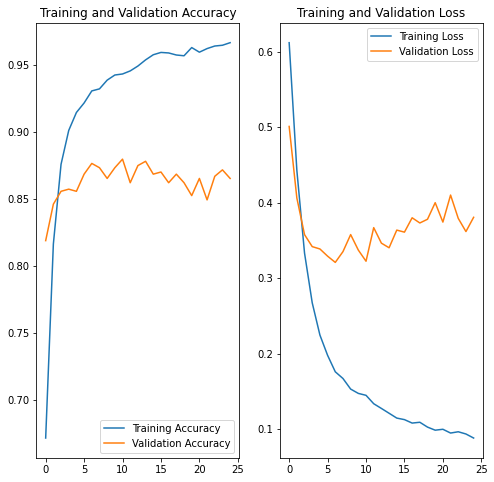

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab/pneumonia_model_vgg')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/pneumonia_model_vgg/assets


In [ ]:
model_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab/pneumonia_model_vgg')

In [ ]:
def predict_class(model, image_size, imgray):
  img=np.array(imgray)/255
  #print(img.shape)
  if len(img.shape) != 2 :
    print ("Image must be 2 dimensional grey image")
    return "Error"
  img = np.tile(img[:, :, None], [1, 1, 3])
  #print(img.shape)
  img = img.reshape(-1,image_size, image_size, 3 )
  #print(img.shape)
  pred = model.predict(img)
  if np.round(pred) == 1:
    return "Pneumonia"
  else: 
    return "Normal"

In [ ]:
print(IMG_SHAPE)
imgray = Image.open(os.path.join(validation_pn_dir, "person101_bacteria_484.jpeg")).resize((IMG_SHAPE,IMG_SHAPE)) 
predict_class(model_vgg,IMG_SHAPE, imgray)

224


'Pneumonia'

In [ ]:
imgray = Image.open(os.path.join(validation_norm_dir, "IM-0001-0001.jpeg")).resize((IMG_SHAPE,IMG_SHAPE)) 
predict_class(model_vgg, IMG_SHAPE,imgray)

'Pneumonia'

In [ ]:
print(IMG_SHAPE)
validation(model, IMG_SHAPE, validation_norm_dir)
validation(model, IMG_SHAPE, validation_pn_dir)

224
234 138 96 0
390 5 385 0


In [ ]:
print(IMG_SHAPE)
validation(model, IMG_SHAPE, train_norm_dir)
validation(model, IMG_SHAPE, train_pn_dir)

224
1341 1202 139 0
3875 681 3194 0


***